**Framework for the Market Simulation:**

**Agent Types:** 
- Impulsive Agent: Buys items more frequently and is less sensitive to price changes.
- Neutral Agent: Buys items at a moderate frequency and has a moderate sensitivity to price changes.
- Conservative Agent: Buys items infrequently and is highly sensitive to price changes.

**Market Setup:**

- A fixed number of items are available for purchase.
- Each item has a base price, which may fluctuate slightly during the simulation.

**Agent Rules:**

- Buying Frequency: Impulsive > Neutral > Conservative.
- Price Sensitivity: Conservative > Neutral > Impulsive.
- Each agent type decides whether to buy an item based on its price and their buying behavior.

**Simulation Process:**

- The market operates in discrete time steps.
- At each time step, each agent decides whether to buy an item based on their type and the current item price.
- Prices can fluctuate each time step, influencing the agents' decisions.

In [195]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [196]:
# Define the agent types
class Agent:
    def __init__(self, type, sensitivity, frequency):
        self.type = type
        self.sensitivity = sensitivity
        self.frequency = frequency
        self.purchase_history = []

    def decide_to_buy(self, price):
        # The decision to buy is based on sensitivity to price and a random factor based on frequency
        return random.random() < self.frequency / price ** self.sensitivity

In [197]:
# Initialize agents
num_agents = 30
agents = []
for _ in range(num_agents // 3):
    # Uncomment below if you want agents of each type to have a slightly different behaviour
    # impulsive_sensitivity = np.random.uniform(0.0, 0.51) 
    # neutral_sensitiviy = np.random.uniform(0.52, 1.5) 
    # conservative_sensitivity = np.random.uniform(1.5, 3)

    # impulsive_frequency = np.random.uniform(0.7, 1.2) 
    # neutral_frequency = np.random.uniform(0.4, 0.7)
    # conservative_frequency = np.random.uniform(0.1, 0.4) 

    # agents.append(Agent("Impulsive", sensitivity=impulsive_sensitivity, frequency=impulsive_frequency))  # Impulsive agents
    # agents.append(Agent("Neutral", sensitivity=neutral_sensitiviy, frequency=neutral_frequency))     # Neutral agents
    # agents.append(Agent("Conservative", sensitivity=conservative_sensitivity, frequency=conservative_frequency)) # Conservative agents

    # Comment below if you want agents of each time to have a slightly different behaviour
    agents.append(Agent("Impulsive", sensitivity=0.5, frequency=0.9))  # Impulsive agents
    agents.append(Agent("Neutral", sensitivity=1.0, frequency=0.6))     # Neutral agents
    agents.append(Agent("Conservative", sensitivity=1.2, frequency=0.5)) # Conservative agents

In [198]:
def get_price(sales, base_price, m):
    price = base_price + m * sales
    return price 

In [199]:
# Market simulation
num_steps = 100
base_price = 5
m = 0.1
price_fluctuation = 0.5
total_purchases = []
prices = []

for step in range(num_steps):
    # current_price = base_price + random.uniform(-price_fluctuation, price_fluctuation)
    if len(total_purchases):
        current_price = get_price(total_purchases[-1], base_price, m) + random.uniform(-price_fluctuation, price_fluctuation)
    else:
        current_price = base_price + random.uniform(-price_fluctuation, price_fluctuation)
    purchases = 0
    for agent in agents:
        if agent.decide_to_buy(current_price):
            purchases += 1
            agent.purchase_history.append(current_price)
        else:
            agent.purchase_history.append(np.nan)
    total_purchases.append(purchases)
    prices.append(current_price)

**Analysing Simulation Results**

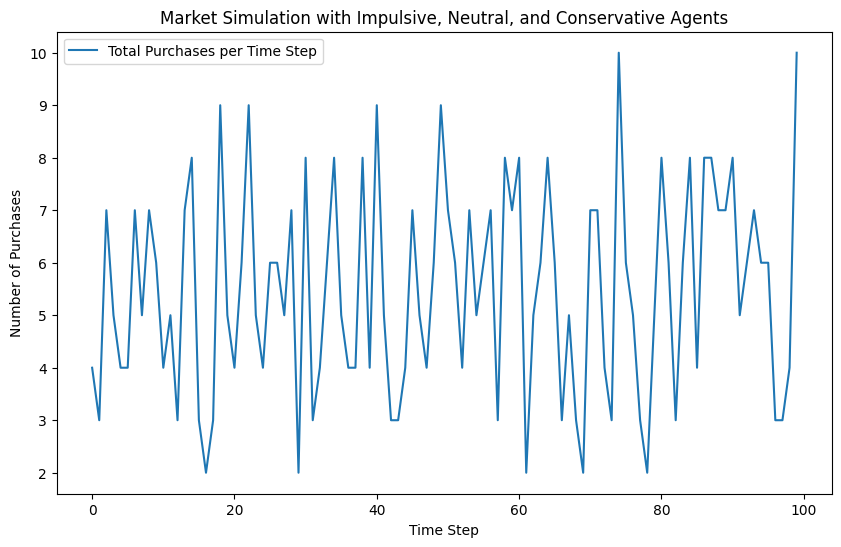

In [200]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(total_purchases, label='Total Purchases per Time Step')
plt.xlabel('Time Step')
plt.ylabel('Number of Purchases')
plt.title('Market Simulation with Impulsive, Neutral, and Conservative Agents')
plt.legend()
plt.show()

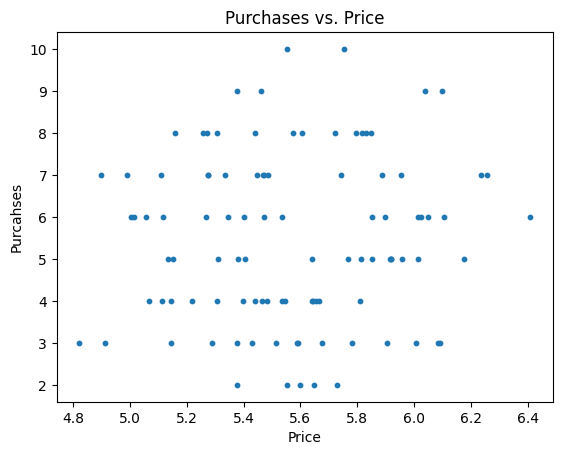

In [205]:
_ = plt.plot(figsize=(10, 6))
plt.scatter(prices, total_purchases, s=10)
plt.xlabel("Price")
plt.ylabel("Purcahses")
plt.title("Purchases vs. Price")
plt.show()

In [202]:
impulsive_agents = [agent.purchase_history for agent in agents if agent.type == "Impulsive"]
impulsive_agents = np.array(impulsive_agents).T

neutral_agents = [agent.purchase_history for agent in agents if agent.type == "Neutral"]
neutral_agents = np.array(neutral_agents).T

conservative_agents = [agent.purchase_history for agent in agents if agent.type == "Conservative"]
conservative_agents = np.array(conservative_agents).T


/var/folders/bj/29t6z1r11lb7j3cmky0fs7p80000gn/T/ipykernel_31227/975535882.py:1: RuntimeWarning: Mean of empty slice
  im_mu = np.nanmean(impulsive_agents, axis=1)
/var/folders/bj/29t6z1r11lb7j3cmky0fs7p80000gn/T/ipykernel_31227/975535882.py:5: RuntimeWarning: Mean of empty slice
  ne_mu = np.nanmean(neutral_agents, axis=1)
/var/folders/bj/29t6z1r11lb7j3cmky0fs7p80000gn/T/ipykernel_31227/975535882.py:9: RuntimeWarning: Mean of empty slice
  co_mu = np.nanmean(conservative_agents, axis=1)


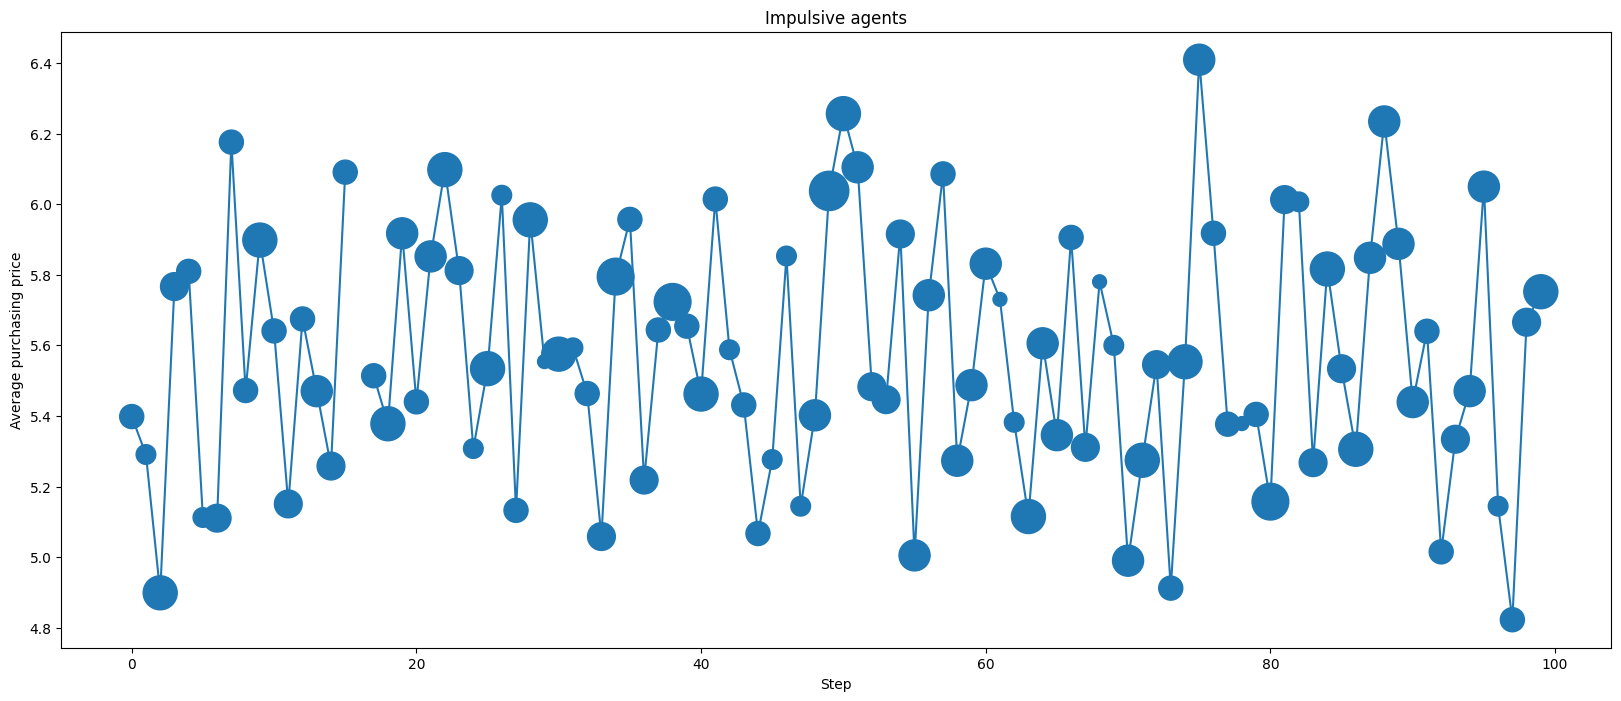

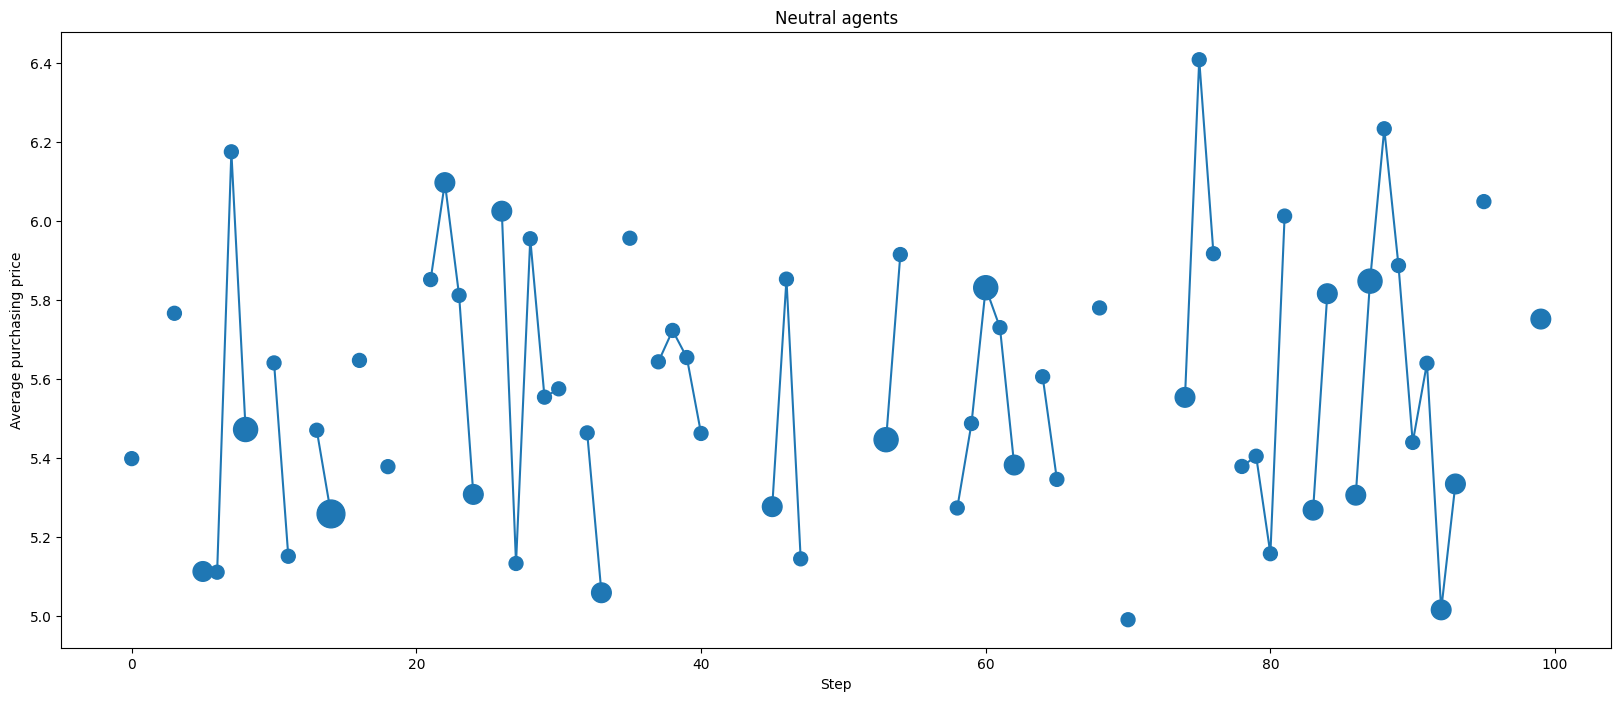

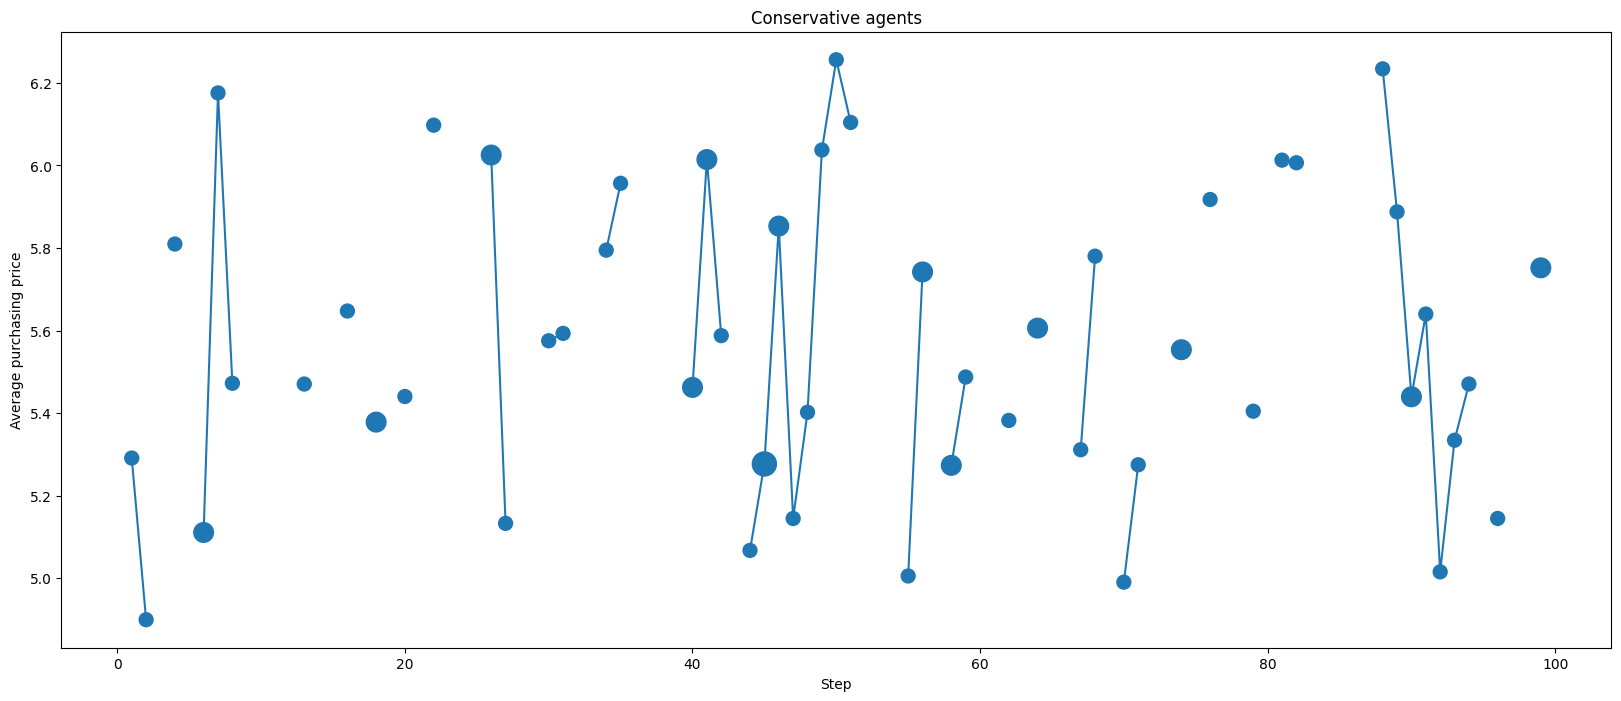

In [203]:
im_mu = np.nanmean(impulsive_agents, axis=1)
impulsive_agents[np.isnan(impulsive_agents)] = 0
im_count = np.count_nonzero(impulsive_agents, axis=1) * 100

ne_mu = np.nanmean(neutral_agents, axis=1)
neutral_agents[np.isnan(neutral_agents)] = 0
ne_count = np.count_nonzero(neutral_agents, axis=1) * 100

co_mu = np.nanmean(conservative_agents, axis=1)
conservative_agents[np.isnan(conservative_agents)] = 0
co_count = np.count_nonzero(conservative_agents, axis=1) * 100

_ = plt.figure(figsize=(20, 8))
plt.plot(im_mu)
plt.scatter(range(num_steps), im_mu, s=im_count)
plt.xlabel("Step")
plt.ylabel("Average purchasing price")
plt.title("Impulsive agents")
plt.show()

_ = plt.figure(figsize=(20, 8))
plt.plot(ne_mu)
plt.scatter(range(num_steps), ne_mu, s=ne_count)
plt.xlabel("Step")
plt.ylabel("Average purchasing price")
plt.title("Neutral agents")
plt.show()

_ = plt.figure(figsize=(20, 8))
plt.plot(co_mu)
plt.scatter(range(num_steps), co_mu, s=co_count)
plt.xlabel("Step")
plt.ylabel("Average purchasing price")
plt.title("Conservative agents")
plt.show()

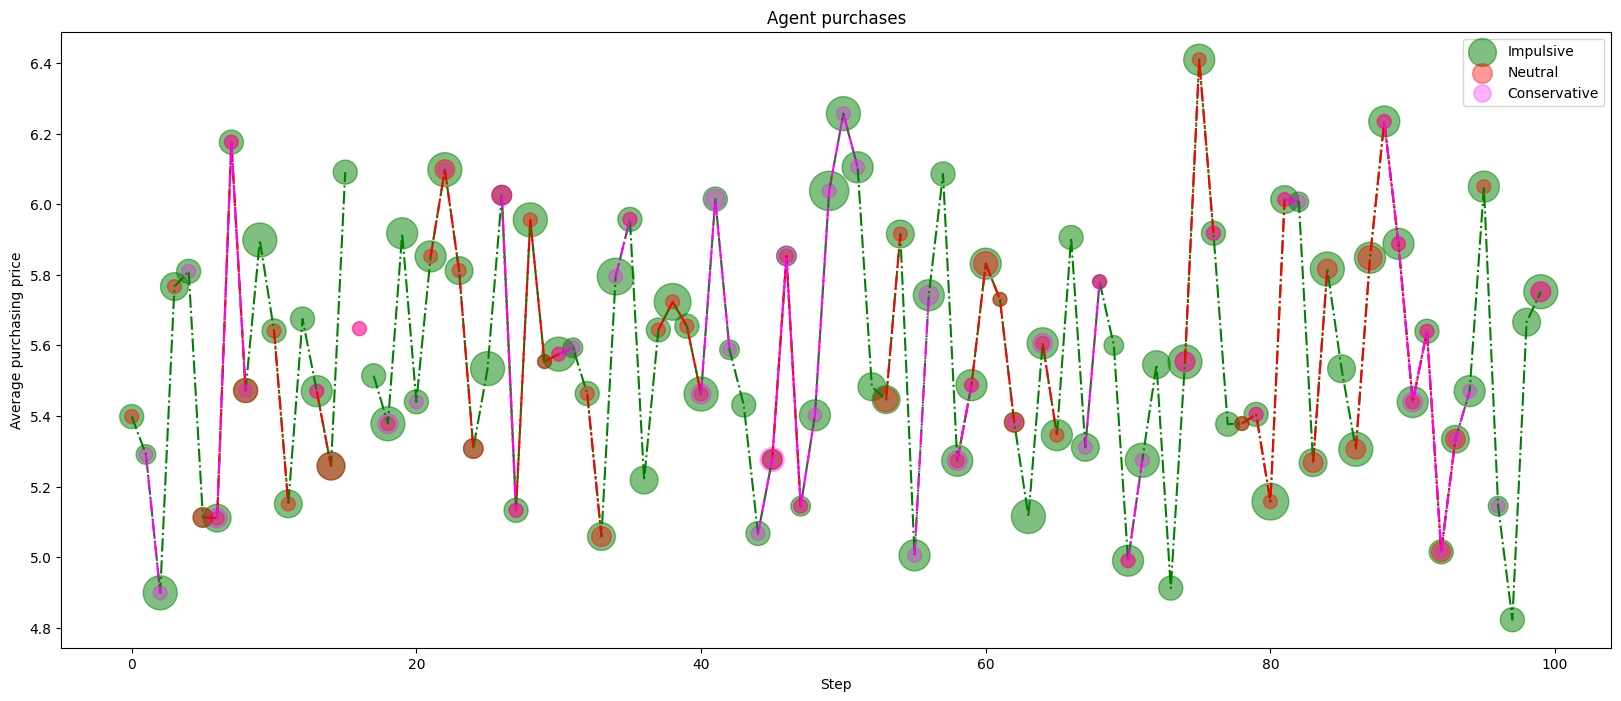

In [208]:
_ = plt.figure(figsize=(20, 8))
plt.plot(im_mu, c="green", linestyle="-.")
plt.scatter(range(num_steps), im_mu, s=im_count, c="green", label="Impulsive", alpha=0.5)

plt.plot(ne_mu, c="red", linestyle="-.")
plt.scatter(range(num_steps), ne_mu, s=ne_count, c="red", label="Neutral", alpha=0.4)

plt.plot(co_mu, c="magenta", linestyle="-.")
plt.scatter(range(num_steps), co_mu, s=co_count, c="magenta", label="Conservative", alpha=0.3)

plt.xlabel("Step")
plt.ylabel("Average purchasing price")
plt.title("Agent purchases")
plt.legend()
plt.show()